In [1]:
#Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.
# Examples & Explanations: https://github.com/rdemaria/pytimber/blob/master/examples/pyTimberExamples.ipynb
%matplotlib notebook
import pytimber
import time
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
#We now open the connection to the database:
db = pytimber.LoggingDB()

In [3]:
db.search("XRP.51779%LVDT%")  #RP0

[u'XRP.51779.H1:LVDTPOSITION', u'XRP.51779.H2:LVDTPOSITION']

In [4]:
db.search("XRPH.51937%LVDT%") #RP1

[u'XRPH.51937.H1:MEAS_LVDT', u'XRPH.51937.H2:MEAS_LVDT']

In [5]:
db.search("TECS.51652%LVDT%") #CR1&2

[u'TECS.51652:AXISALVDTANGLE',
 u'TECS.51652:AXISALVDTPOSITION',
 u'TECS.51652:AXISBLVDTANGLE',
 u'TECS.51652:AXISBLVDTPOSITION']

In [6]:
db.search("TECS.51799%LVDT%") #CR3&4

[u'TECS.51799.LINDW:LVDTPOSITION',
 u'TECS.51799.LINDW:MEAS_LVDT',
 u'TECS.51799.LINUP:LVDTPOSITION',
 u'TECS.51799.LINUP:MEAS_LVDT',
 u'TECS.51799:CRYSTALALVDTANGLE',
 u'TECS.51799:CRYSTALBLVDTANGLE']

In [7]:
db.search("TACW.51797%LVDT%") #Absorber

[u'TACW.51797.LINDW:LVDTPOSITION', u'TACW.51797.LINUP:LVDTPOSITION']

In [8]:
db.search("TCSM.51934%LVDT%") #LHC Collimator

[u'TCSM.51934:MEAS_LVDT_GD',
 u'TCSM.51934:MEAS_LVDT_GU',
 u'TCSM.51934:MEAS_LVDT_LD',
 u'TCSM.51934:MEAS_LVDT_LU',
 u'TCSM.51934:MEAS_LVDT_RD',
 u'TCSM.51934:MEAS_LVDT_RU']

In [9]:
db.search("BLMI.LSS5%LOSSES") #Losses

[u'BLMI.LSS5.1:LOSSES',
 u'BLMI.LSS5.2:LOSSES',
 u'BLMI.LSS5.3:LOSSES',
 u'BLMI.LSS5.4:LOSSES',
 u'BLMI.LSS5.5:LOSSES',
 u'BLMI.LSS5.6:LOSSES',
 u'BLMI.LSS5.7:LOSSES',
 u'BLMI.LSS5.8:LOSSES']

In [10]:
db.search("%SPS.BPMCOL.BOX1.HOR%HORLINEARPOS%") #BPM

[u'SPS.BPMCOL.BOX1.HOR_DOWN:HORLINEARPOS',
 u'SPS.BPMCOL.BOX1.HOR_UP:HORLINEARPOS']

In [11]:
#Position
RP0I_position='XRP.51779.H2:LVDTPOSITION'
RP0E_position='XRP.51779.H1:LVDTPOSITION'
RP1I_position='XRPH.51937.H2:MEAS_LVDT'
CRY1_position='TECS.51652:AXISALVDTPOSITION'
CRY2_position='TECS.51652:AXISBLVDTPOSITION'
CRY3_position='TECS.51799.LINUP:LVDTPOSITION'
CRY4_position='TECS.51799.LINDW:LVDTPOSITION'
TACW_DW_position='TACW.51797.LINDW:LVDTPOSITION'
TACW_UP_position='TACW.51797.LINUP:LVDTPOSITION'
LHC_RDW_position='TCSM.51934:MEAS_LVDT_RD'
LHC_RUP_position='TCSM.51934:MEAS_LVDT_RU'

#Angle
CRY1_angle='TECS.51652:AXISALVDTANGLE'
CRY2_angle='TECS.51652:AXISBLVDTANGLE'
CRY3_angle='TECS.51799:CRYSTALALVDTANGLE'
CRY4_angle='TECS.51799:CRYSTALBLVDTANGLE'

#Losses
BLM3='BLMI.LSS5.3:LOSSES'

#BPM
BPM_UP='SPS.BPMCOL.BOX1.HOR_UP:HORLINEARPOS'
BPM_DW='SPS.BPMCOL.BOX1.HOR_DOWN:HORLINEARPOS'

time_ini='2018-09-17 19:41:37'
time_fin='2018-09-17 19:48:47'


In [12]:
data=db.get([
    RP0I_position,
    RP0E_position,
    RP1I_position,
    CRY1_position,
    CRY2_position,
    CRY3_position,
    CRY4_position,
    CRY1_angle,
    CRY2_angle,
    CRY3_angle,
    CRY4_angle,
    TACW_DW_position,
    TACW_UP_position,
    LHC_RDW_position,
    LHC_RUP_position,
    BLM3
],time_ini,time_fin)

<IPython.core.display.Javascript object>


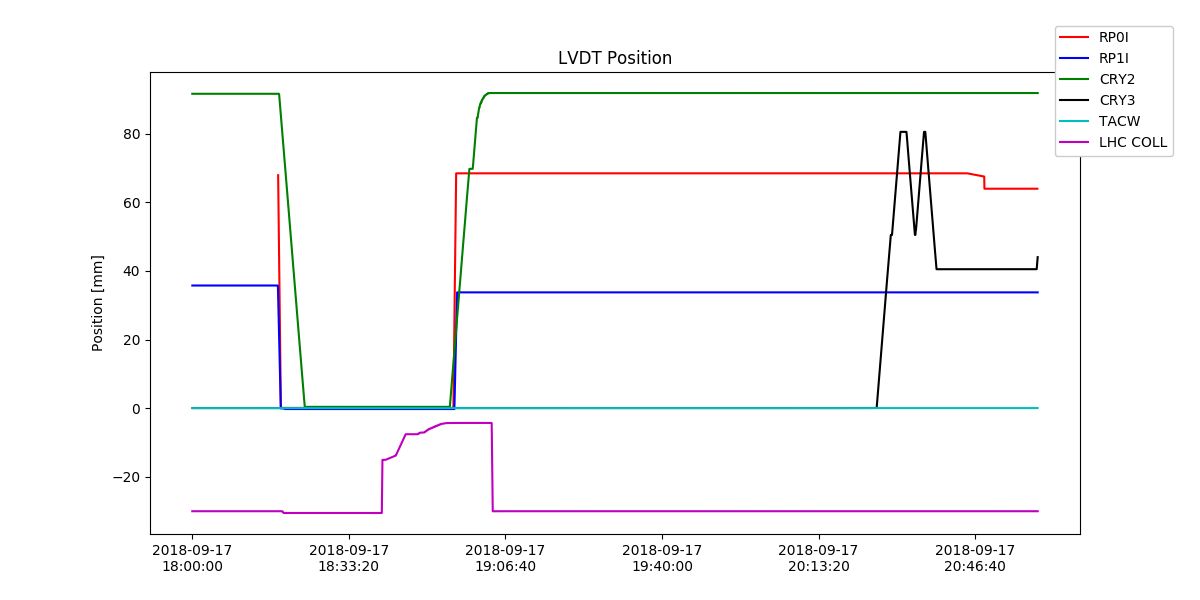

In [13]:
#Create figure
plt.figure(figsize=(12,6))

tt,vv=data[RP0I_position]
plt.plot(tt,vv,'-r',label='RP0I')

tt,vv=data[RP1I_position]
plt.plot(tt,vv,'-b',label='RP1I')

tt,vv=data[CRY2_position]
plt.plot(tt,vv,'-g',label='CRY2')

tt,vv=data[CRY3_position]
plt.plot(tt,vv,'-k',label='CRY3')

tt,vv=data[TACW_DW_position]
plt.plot(tt,vv,'-c',label='TACW')

tt,vv=data[LHC_RDW_position]
plt.plot(tt,vv,'-m',label='LHC COLL')

#Set axis and legend
plt.ylabel('Position [mm]')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)
plt.title('LVDT Position')
pytimber.set_xaxis_date()

<IPython.core.display.Javascript object>


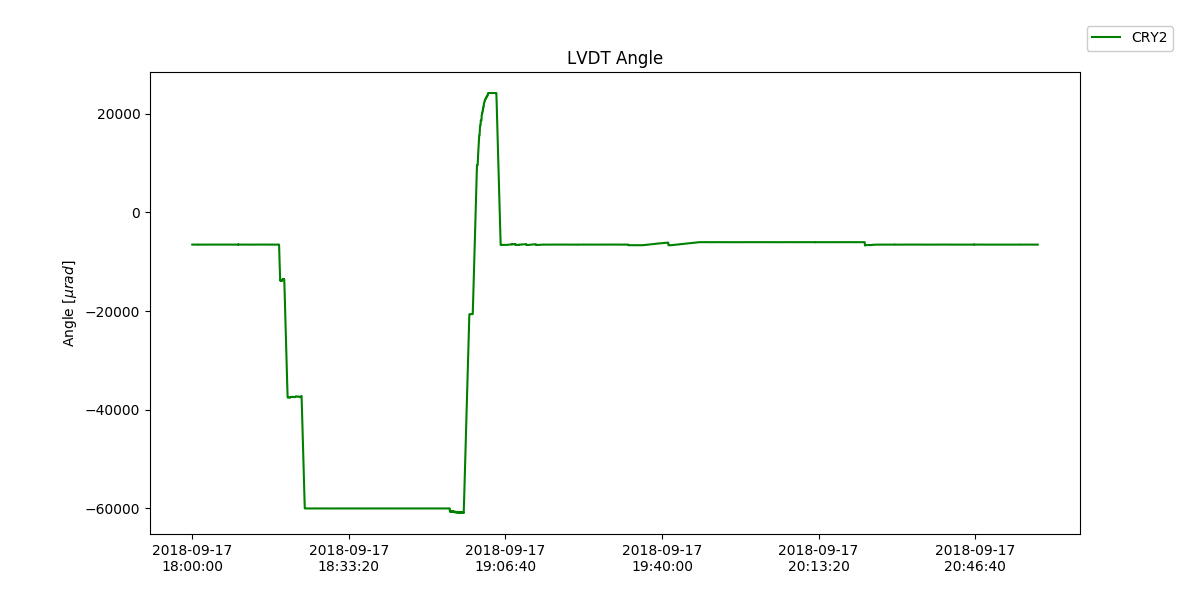

In [14]:
plt.figure(figsize=(12,6))

tt,vv=data[CRY2_angle]
plt.plot(tt,vv,'-g',label='CRY2')

# tt,vv=data[CRY3_angle]
# plt.plot(tt,vv,'-b',label='CRY3')

#Set axis and legend
plt.ylabel('Angle [$\mu rad$]')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)
plt.title('LVDT Angle')
pytimber.set_xaxis_date()

# dat = np.array([tt,vv])
# dat = dat.T
# with open("crystal2_angularscan.dat", "w") as file_object:
#     np.savetxt(file_object, dat, fmt=['%20.d','%20.d'])
# file_object.close()

<IPython.core.display.Javascript object>


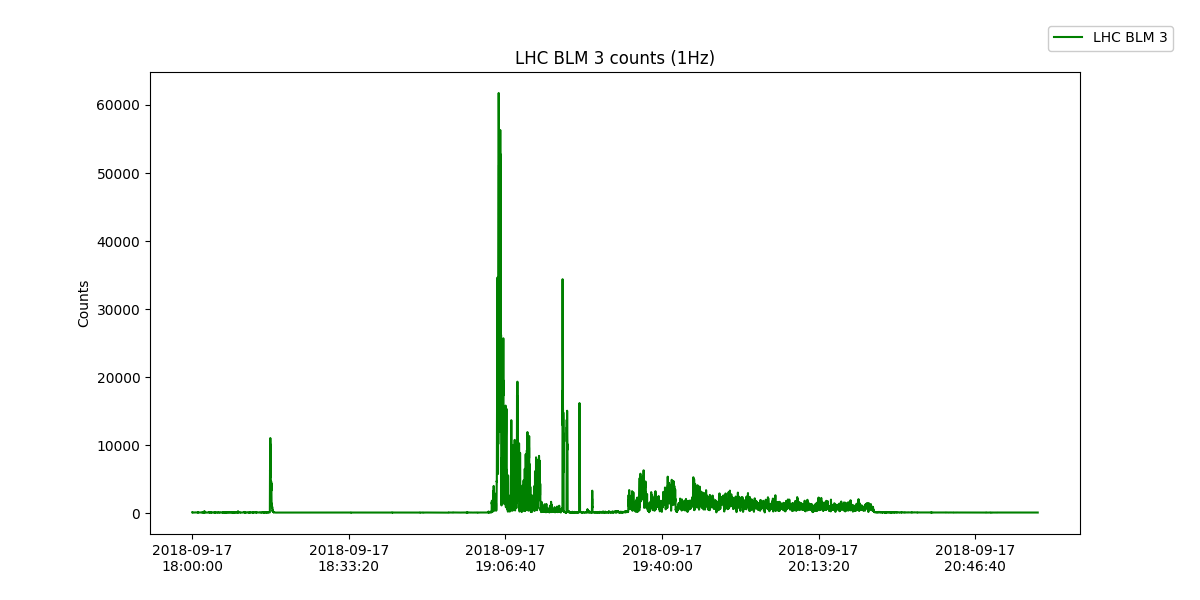

In [15]:
plt.figure(figsize=(12,6))

tt, dd = data[BLM3]
dd=dd.T
vv=dd[8] #1Hz

plt.plot(tt,vv,'-g',label='LHC BLM 3')
plt.title('LHC BLM 3 counts (1Hz)')
pytimber.set_xaxis_date()

#Set axis and legend
plt.ylabel('Counts')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)

<IPython.core.display.Javascript object>


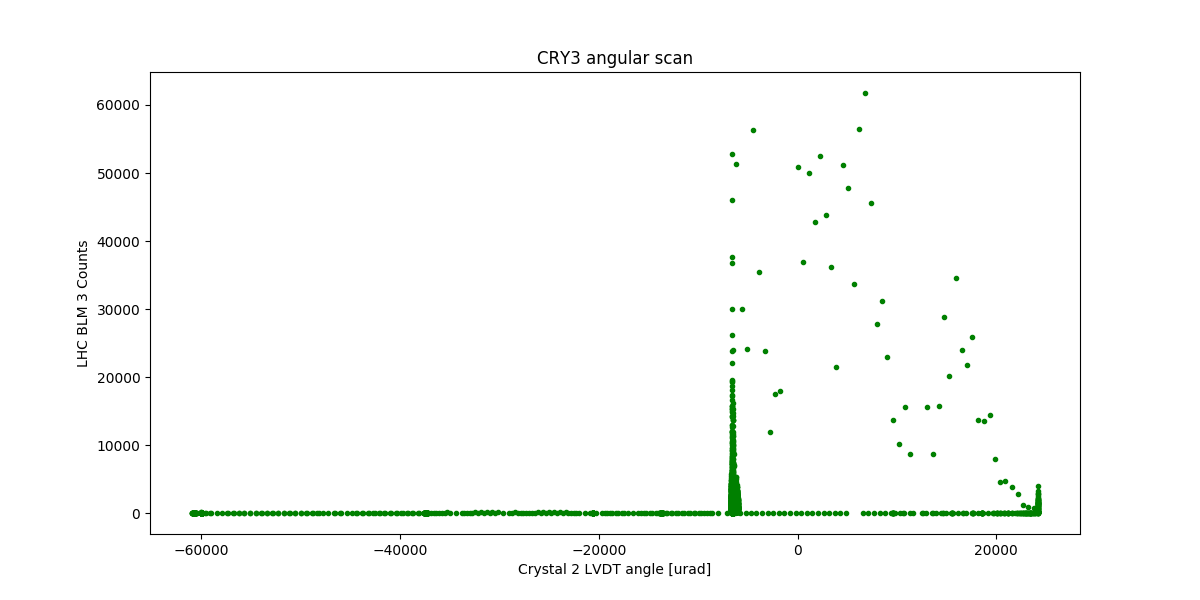

Text(0,0.5,u'LHC BLM 3 Counts')

In [16]:
data=db.getAligned([CRY2_angle,BLM3],time_ini,time_fin)

plt.figure(figsize=(12,6))

dd=data[BLM3]
dd=dd.T
vv1=dd[8] #1Hz

vv2=data[CRY2_angle]
plt.plot(vv2,vv1,'.g',label='LHC BLM 3')

plt.title('CRY3 angular scan')
plt.xlabel('Crystal 2 LVDT angle [urad]')
plt.ylabel('LHC BLM 3 Counts')